In [1]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\ABISA\Desktop\drug side effect.csv")

In [3]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Olivia Brewer,Hispanic
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,Rebecca David,Native American
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,Michael Carlson,African American
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,Robert Jackson,Native American
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,Jennifer Brown,Asian


In [4]:
df.tail()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2,Lauren Garcia,Caucasian
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16,Angela Sanders,Native American
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3,William Duncan,Hispanic
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1,Chelsea Hughes DDS,Hispanic
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3,Jeffrey Collins,Asian


In [5]:
df.shape


(362806, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
 12  Name           362806 non-null  object
 13  Race           362806 non-null  object
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


# Preprocessing

In [7]:
# Identify missing values
df.isna().sum() 

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
Name              0
Race              0
dtype: int64

In [8]:
df[['Drug','Condition','Effectiveness']].head(15)

,Drug,Condition,Effectiveness
0,25dph-7.5peh,Stuffy Nose,5
1,25dph-7.5peh,Cold Symptoms,5
2,warfarin (bulk) 100 % powder,Other,3
3,warfarin (bulk) 100 % powder,Other,2
4,warfarin (bulk) 100 % powder,Other,1
5,warfarin (bulk) 100 % powder,Other,4
6,wymzya fe,Birth Control,5
7,wymzya fe,Disease of Ovaries with Cysts,5
8,wymzya fe,Acne,2
9,"12 hour nasal relief spray, non-aerosol",Stuffy Nose,2


In [9]:
df[['Drug','Condition','Effectiveness','Reviews']].head(15)

,Drug,Condition,Effectiveness,Reviews
0,25dph-7.5peh,Stuffy Nose,5,I'm a retired physician and of all the meds I ...
1,25dph-7.5peh,Cold Symptoms,5,cleared me right up even with my throat hurtin...
2,warfarin (bulk) 100 % powder,Other,3,why did my PTINR go from a normal of 2.5 to ov...
3,warfarin (bulk) 100 % powder,Other,2,FALLING AND DON'T REALISE IT
4,warfarin (bulk) 100 % powder,Other,1,My grandfather was prescribed this medication ...
5,warfarin (bulk) 100 % powder,Other,4,help heart condition operation well
6,wymzya fe,Birth Control,5,Haven't gotten pregnant so it does it's job. I...
7,wymzya fe,Disease of Ovaries with Cysts,5,I have take this for 5 years age 45-50 to prev...
8,wymzya fe,Acne,2,
9,"12 hour nasal relief spray, non-aerosol",Stuffy Nose,2,The 12 hour spray only works for me for 6 hours.


In [10]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DrugId,362806.0,36879.370774,52624.412971,1.0,4896.0,9548.0,63522.0,178546.0
EaseofUse,362806.0,4.019829,1.317711,1.0,3.0,5.0,5.0,10.0
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0
UsefulCount,362806.0,6.744916,9.324240,0.0,1.0,4.0,9.0,255.0


In [12]:
df.describe(include='object').T

,count,unique,top,freq
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250167,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460
Name,362806,180676,Michael Smith,176
Race,362806,5,African American,72824


In [13]:
df.duplicated().sum()

0

In [14]:
for i in df.columns:
    print(i,':',df[i].nunique(),'\n')

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250167 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 

Name : 180676 

Race : 5 



In [15]:
df['Name'].value_counts()

Michael Smith         176
Michael Johnson       132
James Smith           129
Michael Williams      123
Jennifer Smith        110
                     ... 
Natalie Patel           1
Cynthia Barker DVM      1
Jordan Powers           1
Renee Durham            1
Chelsea Hughes DDS      1
Name: Name, Length: 180676, dtype: int64

In [16]:
df['Race'].value_counts()

African American    72824
Native American     72666
Hispanic            72599
Caucasian           72473
Asian               72244
Name: Race, dtype: int64

In [17]:
df['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [18]:
df['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

In [19]:
df['Effectiveness'].value_counts()

5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: Effectiveness, dtype: int64

In [20]:
df['Reviews'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           41824
good                                                                                                                                                                                                                                                                                                                                                   

In [21]:
df['Satisfaction'].value_counts()

5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64

In [22]:
df['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [23]:
df['Sides'].value_counts()

                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9162
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas,  dia

In [24]:
df['Condition'].value_counts()

Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: Condition, Length: 1806, dtype: int64

In [25]:
df['Drug'].value_counts().head(30)

cymbalta                                               4648
lisinopril                                             4269
lisinopril solution                                    4269
lexapro                                                4134
hydrocodone-acetaminophen                              3944
effexor xr                                             3486
lyrica                                                 3069
tramadol hcl er                                        2932
tramadol hcl                                           2932
zoloft                                                 2662
prednisone tablet, delayed release (enteric coated)    2576
prednisone concentrate                                 2576
prednisone                                             2576
seroquel                                               2446
phentermine hcl                                        2367
celexa                                                 2224
topamax                                 

In [26]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Name', 'Race'],
      dtype='object')

In [27]:
df.isna().sum() 

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
Name              0
Race              0
dtype: int64

In [28]:
# How many Drugs per condition (Top 20)
df.groupby('Condition')['Drug'].nunique().nlargest(20)

Condition
Other                                         4469
Osteoporosis                                   229
Birth Control                                  204
Pain                                           202
High Blood Pressure                            200
Acne                                           197
Painful Periods                                161
Rheumatoid Arthritis                           148
Cough                                          137
Cold Symptoms                                  129
Inflammation of the Nose due to an Allergy     122
Type 2 Diabetes Mellitus                       117
Abnormally Long or Heavy Periods               111
Incomplete or Infrequent Bowel Movements       109
Stuffy Nose                                    108
Disease of Ovaries with Cysts                  103
Allergic Conjunctivitis                        102
Migraine Headache                               95
"Change of Life" Signs                          92
Atopic Dermatitis    

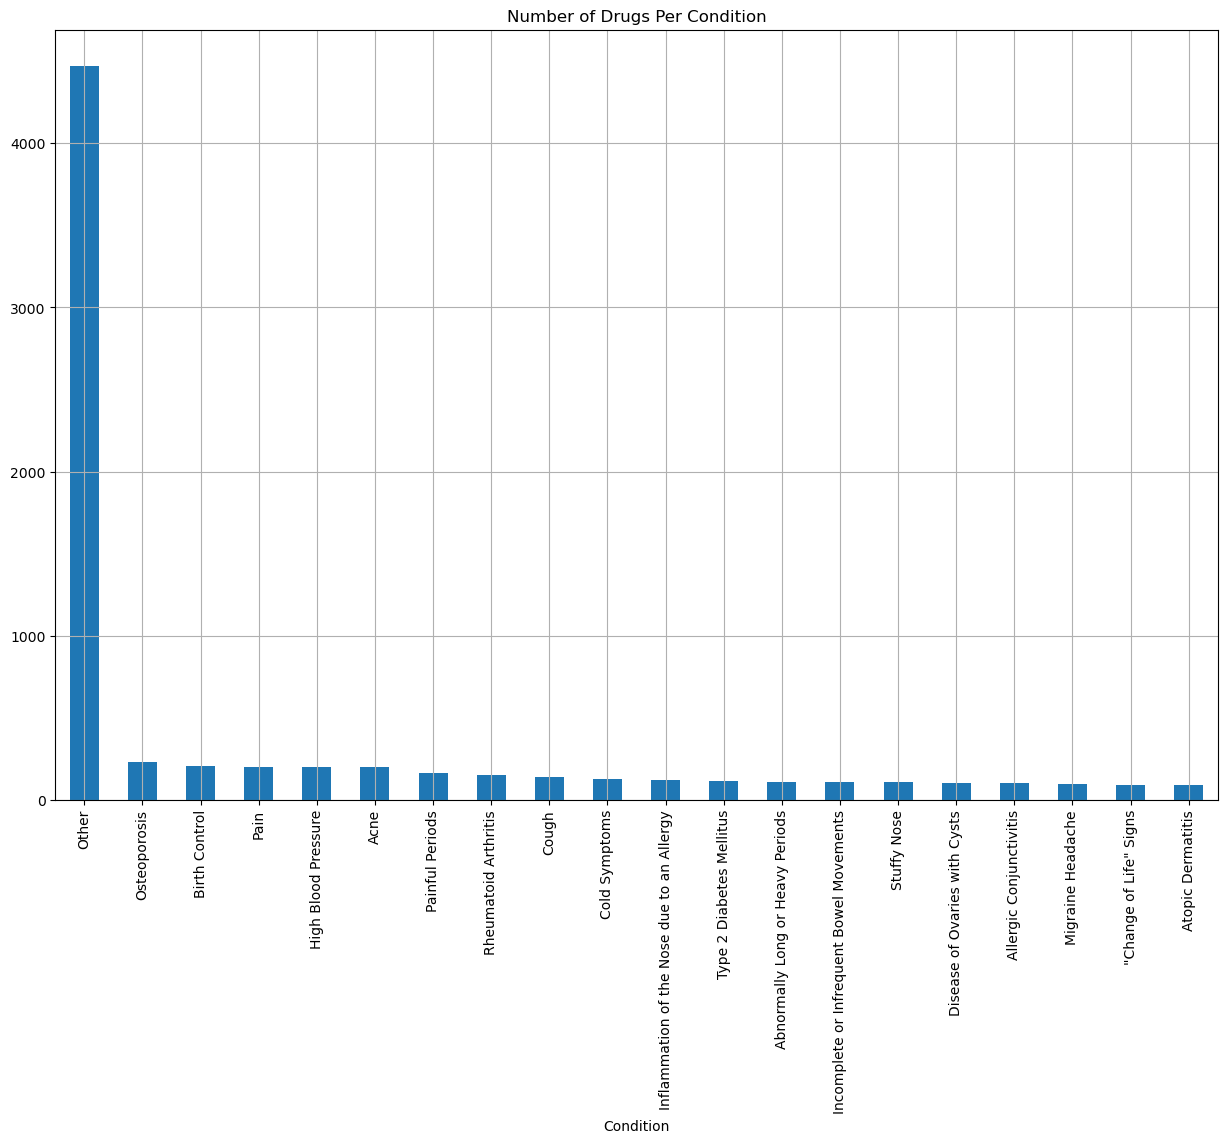

In [29]:
# How many Drugs per condition (Top 20)
plt.figure(figsize=(15,10))
df.groupby('Condition')['Drug'].nunique().nlargest(20).plot(kind='bar')
plt.title("Number of Drugs Per Condition")
plt.grid()
plt.show()


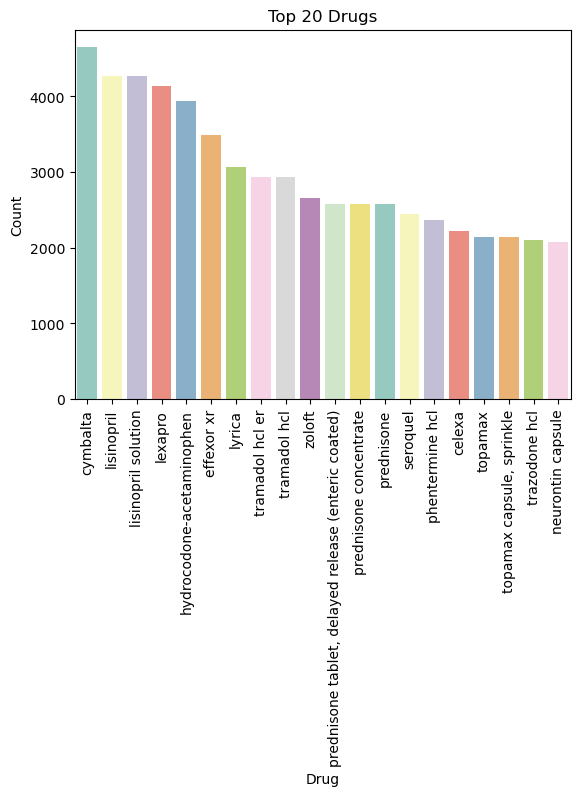

In [30]:
#the list of drugs available (top 20)
top_drugs = df['Drug'].value_counts().head(20)
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='Set3')
plt.title("Top 20 Drugs")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.xticks(rotation=90,fontsize=10)  # Rotates the x-axis labels for better readability
plt.show()

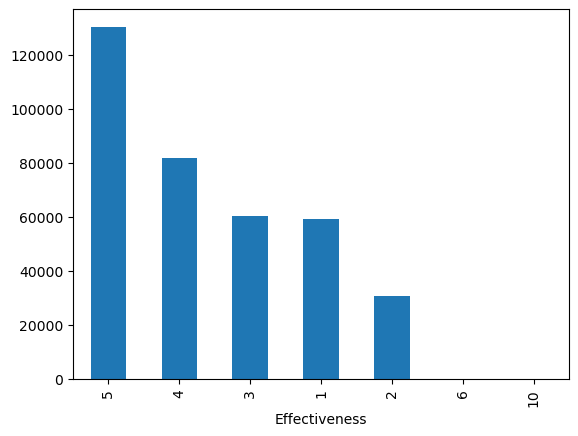

In [31]:
#the effectiveness of the drugs
df['Effectiveness'].value_counts().plot(kind='bar')
plt.xlabel('Effectiveness')
plt.show()

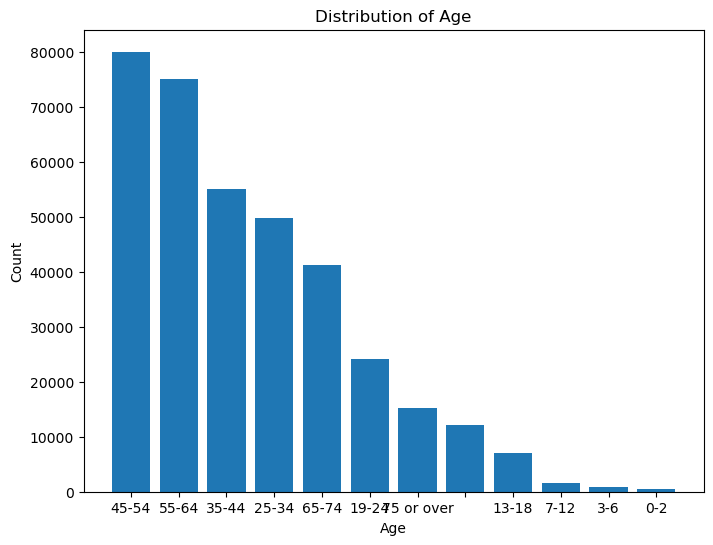

In [32]:
# Visualize the distribution of age
plt.figure(figsize=(8, 6))
plt.bar(df['Age'].value_counts().index, df['Age'].value_counts().values)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

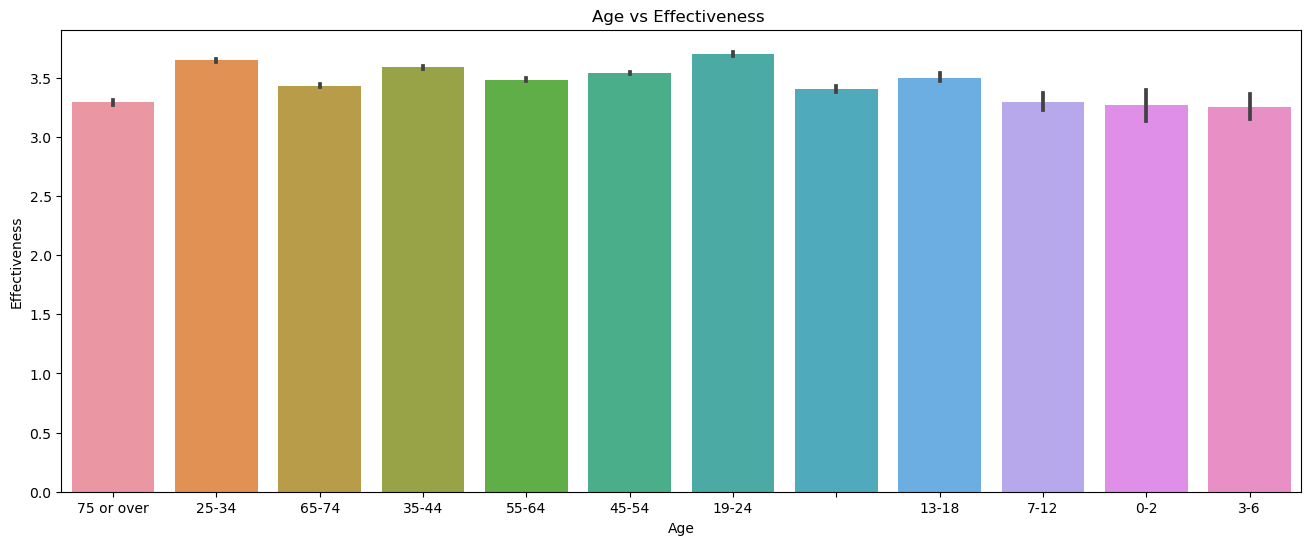

In [33]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='Age', y='Effectiveness', data=df, ax=ax)
ax.set_title('Age vs Effectiveness ')
ax.set_xlabel('Age')
ax.set_ylabel('Effectiveness')
plt.show()

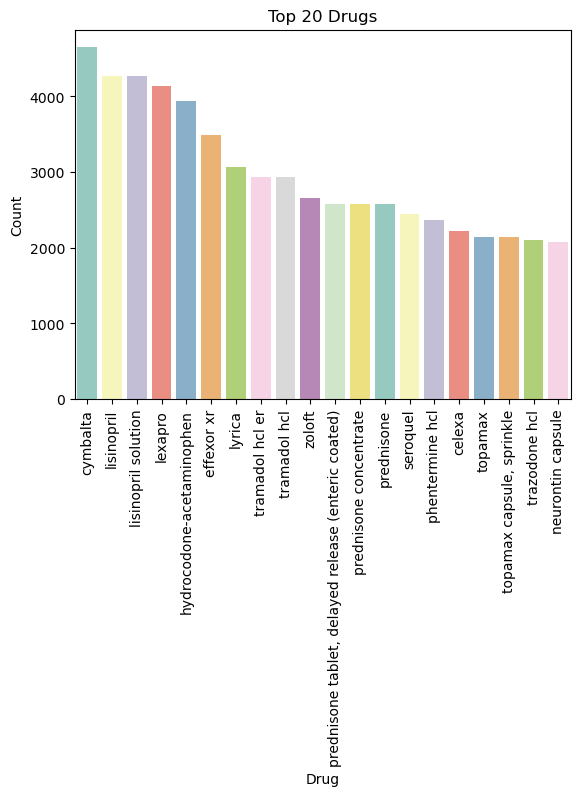

In [34]:
top_drugs = df['Drug'].value_counts().head(20)
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='Set3')
plt.title("Top 20 Drugs")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.xticks(rotation=90,fontsize=10)  # Rotates the x-axis labels for better readability
plt.show()

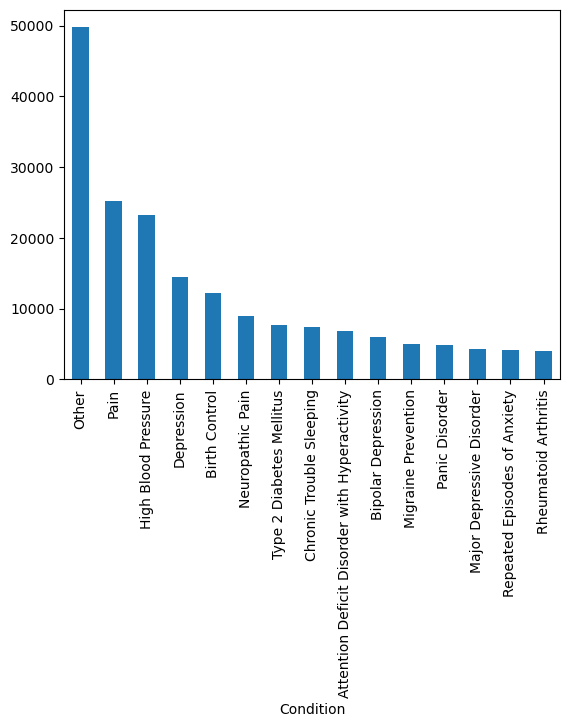

In [35]:
#various condition the medicine cures (top 10)
df['Condition'].value_counts().head(15).plot(kind='bar')
plt.xlabel('Condition')
plt.show()

In [36]:
#Distribution of rating
df['UsefulCount']

0          0
1          1
2          0
3          0
4          1
          ..
362801     2
362802    16
362803     3
362804     1
362805     3
Name: UsefulCount, Length: 362806, dtype: int64

In [37]:
# Average Rating of satisfraction
avg_Satisfaction = (df['Satisfaction'].groupby(df['Drug']).mean())

In [38]:
avg_Satisfaction

Drug
12 hour decongestant                       4.000000
12 hour nasal relief spray, non-aerosol    2.000000
15dm-100gfn-5peh                           1.000000
20dm-4cpm                                  1.000000
25dph-7.5peh                               5.000000
                                             ...   
zytiga                                     4.137931
zyvox                                      3.555556
zyvox solution, intravenous                3.500000
zyvox suspension, reconstituted            3.555556
zzzquil                                    2.884354
Name: Satisfaction, Length: 7093, dtype: float64

In [39]:
# Average Rating of Effectiveness
avg_Effectiveness = (df['Effectiveness'].groupby(df['Drug']).mean())

In [40]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Name', 'Race'],
      dtype='object')

In [41]:
avg_Effectiveness

Drug
12 hour decongestant                       4.000000
12 hour nasal relief spray, non-aerosol    2.000000
15dm-100gfn-5peh                           5.000000
20dm-4cpm                                  1.000000
25dph-7.5peh                               5.000000
                                             ...   
zytiga                                     4.206897
zyvox                                      4.133333
zyvox solution, intravenous                3.937500
zyvox suspension, reconstituted            4.133333
zzzquil                                    3.251701
Name: Effectiveness, Length: 7093, dtype: float64

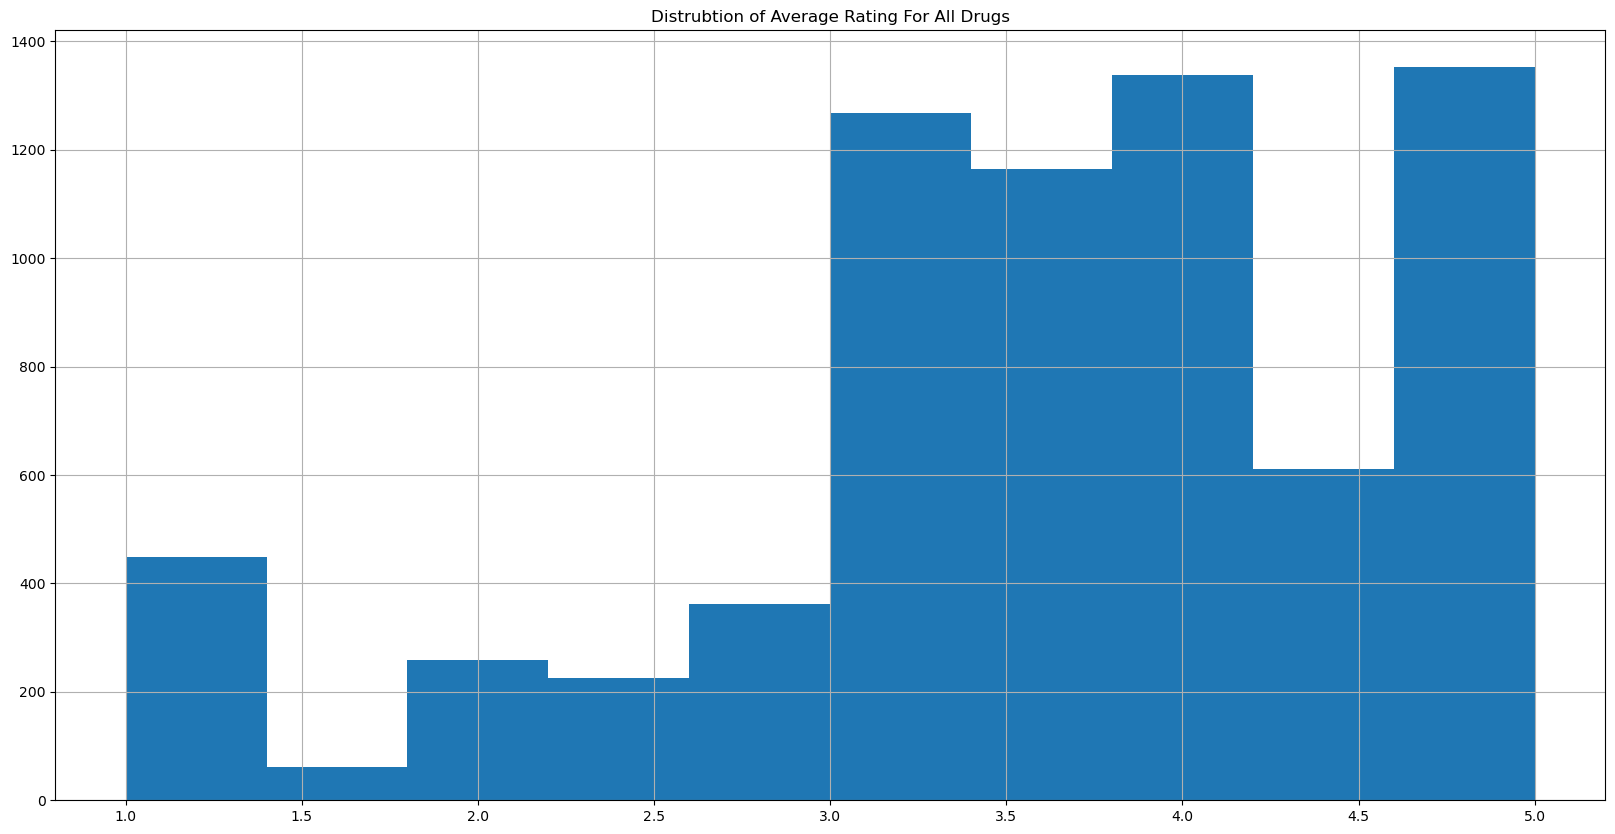

In [42]:
# Average Effectiveness For All Drugs
plt.figure(figsize=(20,10))
avg_Effectiveness.hist()
plt.title("Distrubtion of Average Rating For All Drugs")
plt.show()

In [43]:
# How genuine is the review? (Using sentiment analysis)
from textblob import TextBlob

In [44]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [45]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [46]:
def get_sentiment(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        return blob.polarity
    else:
        return 0.0  # or any other default value for non-string values

def get_sentiment_label(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        if blob.polarity > 0:
            result = 'positive'
        elif blob.polarity < 0:
            result = 'negative'
        else:
            result = 'neutral'
        return result
    else:
        return 'neutral'  # or any other default label for non-string values


In [47]:
# Sentiment Score for Review
df['sentiment'] = df['Reviews'].apply(get_sentiment)


In [48]:
df['sentiment_label'] = df['Reviews'].apply(get_sentiment_label)

In [49]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race,sentiment,sentiment_label
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Olivia Brewer,Hispanic,0.337500,positive
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,Rebecca David,Native American,0.285714,positive
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,Michael Carlson,African American,0.150000,positive
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,Robert Jackson,Native American,0.000000,neutral
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,Jennifer Brown,Asian,0.046429,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2,Lauren Garcia,Caucasian,0.212500,positive
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16,Angela Sanders,Native American,0.004167,positive
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3,William Duncan,Hispanic,-0.443750,negative
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1,Chelsea Hughes DDS,Hispanic,-0.359524,negative


In [50]:
data_copy = df.copy()

In [51]:
# Handling instances with whitespaces
for i in data_copy:
    data_copy[i]=np.where(data_copy[i]==" ",np.NAN,data_copy[i])

In [52]:
data_copy.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race,sentiment,sentiment_label
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0,Olivia Brewer,Hispanic,0.337500,positive
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0,Rebecca David,Native American,0.285714,positive
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,why did my PTINR go from a normal of 2.5 to ov...,3.0,Female,NaN,0.0,Michael Carlson,African American,0.150000,positive
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,FALLING AND DON'T REALISE IT,1.0,Female,NaN,0.0,Robert Jackson,Native American,0.000000,neutral
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,My grandfather was prescribed this medication ...,1.0,Male,NaN,1.0,Jennifer Brown,Asian,0.046429,positive


In [53]:
#checking missing values
data_copy.isnull().sum()

Age                12202
Condition             43
Date                   0
Drug                   0
DrugId                 0
EaseofUse              0
Effectiveness          0
Reviews            41861
Satisfaction           0
Sex                26537
Sides              17460
UsefulCount            0
Name                   0
Race                   0
sentiment              0
sentiment_label        0
dtype: int64

In [54]:
drug_prednisone= df.loc[(df['Drug'] =='prednisone')]
drug_prednisone.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race,sentiment,sentiment_label
120402,,Other,3/2/2020,prednisone,6007,5,5,No Script or health Insurance needed to place ...,5,,"Nausea , vomiting , loss of appetite, heartb...",11,Andrew Garza,Hispanic,-0.075000,negative
120403,55-64,Inflammation of the Artery in the Temple Area,1/1/2020,prednisone,6007,5,4,CVS stated. Claims regarding that it does not ...,2,Female,"Nausea , vomiting , loss of appetite, heartb...",0,Frank Grant,African American,0.150000,positive
120404,65-74,Destruction of Red Blood Cells by Body's Own A...,10/1/2019,prednisone,6007,4,4,It has taken 9 months to taper down from 60mg ...,4,Male,"Nausea , vomiting , loss of appetite, heartb...",0,Robin Lamb,Hispanic,-0.138889,negative
120408,65-74,Destruction of Red Blood Cells by Body's Own A...,10/1/2019,prednisone,6007,4,4,It has taken 9 months to taper down from 60mg ...,4,,"Nausea , vomiting , loss of appetite, heartb...",0,Joshua Chen,Asian,-0.138889,negative
120409,35-44,Myasthenia Gravis,9/8/2019,prednisone,6007,1,1,This med make you sicker and only controls sym...,1,Male,"Nausea , vomiting , loss of appetite, heartb...",0,Sally Mcguire,Hispanic,-0.226042,negative


In [55]:
drug_prednisone['Condition'].value_counts()

Other                                            381
Asthma                                           379
Rheumatoid Arthritis                             242
Obstructive Pulmonary Disease                    113
Skin Condition                                   110
                                                ... 
Chronic Malignant T-Cell Lymphoma of the Skin      1
                                                   1
Neuroendocrine Cancer of the Prostate Gland        1
Diffuse Large B-Cell Lymphoma                      1
Chronic Lymphoid Leukemia                          1
Name: Condition, Length: 92, dtype: int64

In [56]:
data_new = drug_prednisone.copy()

In [57]:
data_copy = df.copy()

In [58]:
# Handling instances with whitespaces
for i in data_new:
    data_new[i]=np.where(data_new[i]==" ",np.NAN,data_new[i])

In [59]:
#checking missing values
data_new.isnull().sum()

Age                 85
Condition            1
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews            291
Satisfaction         0
Sex                131
Sides                0
UsefulCount          0
Name                 0
Race                 0
sentiment            0
sentiment_label      0
dtype: int64

In [60]:
data_new.shape

(2576, 16)

In [61]:
# Removing rows with null data
data_new=data_new.dropna(axis=0)

In [62]:
data_new.isnull().sum()

Age                0
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews            0
Satisfaction       0
Sex                0
Sides              0
UsefulCount        0
Name               0
Race               0
sentiment          0
sentiment_label    0
dtype: int64

In [63]:
data_new.shape

(2153, 16)


# Text processing

In [64]:
# converting rows having data other than string datatype into  string.
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Sides']) != str:
        data_new.iloc[i]['Sides'] = str(data_new.iloc[i]['Sides'])

for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Reviews']) != str:
        data_new.iloc[i]['Reviews'] = str(data_new.iloc[i]['Reviews'])
        
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Condition']) != str:
        data_new.iloc[i]['Condition'] = str(data_new.iloc[i]['Condition'])

In [65]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

In [66]:
data_new.Sides= data_new.Sides.apply(cleaning_text)
data_new.Sides

120403    nausea vomiting loss appetite heartburn troubl...
120404    nausea vomiting loss appetite heartburn troubl...
120409    nausea vomiting loss appetite heartburn troubl...
120413    nausea vomiting loss appetite heartburn troubl...
120419    nausea vomiting loss appetite heartburn troubl...
                                ...                        
122997    nausea vomiting loss appetite heartburn troubl...
122998    nausea vomiting loss appetite heartburn troubl...
122999    nausea vomiting loss appetite heartburn troubl...
123000    nausea vomiting loss appetite heartburn troubl...
123001    nausea vomiting loss appetite heartburn troubl...
Name: Sides, Length: 2153, dtype: object

In [67]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [68]:
import nltk
nltk.data.path


['C:\\Users\\ABISA/nltk_data',
 'C:\\Users\\ABISA\\anaconda3\\nltk_data',
 'C:\\Users\\ABISA\\anaconda3\\share\\nltk_data',
 'C:\\Users\\ABISA\\anaconda3\\lib\\nltk_data',
 'C:\\Users\\ABISA\\AppData\\Roaming\\nltk_data',
 'C:\\nltk_data',
 'D:\\nltk_data',
 'E:\\nltk_data']

In [69]:
data_new['Sides']

120403    nausea vomiting loss appetite heartburn troubl...
120404    nausea vomiting loss appetite heartburn troubl...
120409    nausea vomiting loss appetite heartburn troubl...
120413    nausea vomiting loss appetite heartburn troubl...
120419    nausea vomiting loss appetite heartburn troubl...
                                ...                        
122997    nausea vomiting loss appetite heartburn troubl...
122998    nausea vomiting loss appetite heartburn troubl...
122999    nausea vomiting loss appetite heartburn troubl...
123000    nausea vomiting loss appetite heartburn troubl...
123001    nausea vomiting loss appetite heartburn troubl...
Name: Sides, Length: 2153, dtype: object

In [70]:
data_new['Sex'].value_counts()

Female    1563
Male       590
Name: Sex, dtype: int64

In [71]:
data_new['Age'].value_counts()

45-54         491
55-64         472
65-74         338
35-44         295
25-34         258
75 or over    126
19-24         117
13-18          39
7-12            8
3-6             5
0-2             4
Name: Age, dtype: int64

In [72]:
data_new['Age'].unique()

array(['55-64', '65-74', '35-44', '45-54', '75 or over', '25-34', '19-24',
       '13-18', '3-6', '7-12', '0-2'], dtype=object)

In [73]:
data_new['Age']=data_new['Age'].str.replace('75 or over','75-100')

In [74]:
data_new['Age'].value_counts()

45-54     491
55-64     472
65-74     338
35-44     295
25-34     258
75-100    126
19-24     117
13-18      39
7-12        8
3-6         5
0-2         4
Name: Age, dtype: int64

# Outliers detection

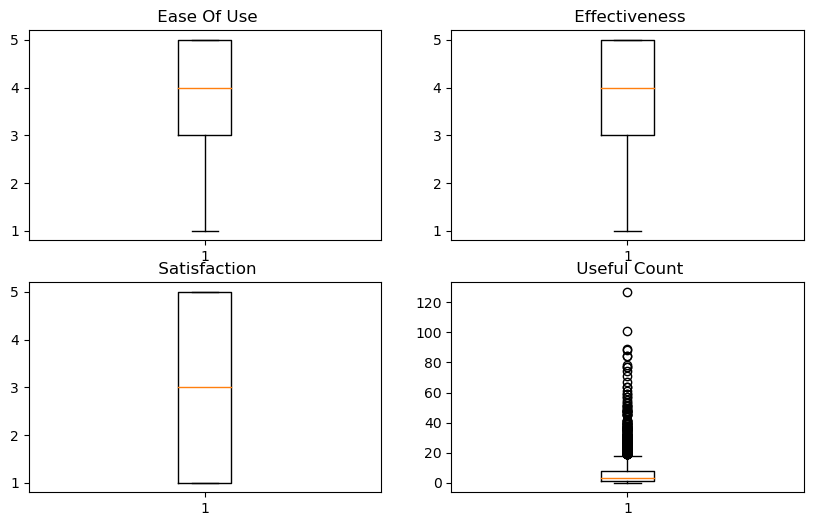

In [75]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_new["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data_new["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data_new["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data_new["UsefulCount"])
plt.title(" Useful Count")
plt.show()

# Removing outliers

In [76]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [77]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['UsefulCount']:
    index_list.extend(outliers(data_new,feature))
index_list

[120439,
 120477,
 120491,
 120503,
 120506,
 120511,
 120523,
 120525,
 120531,
 120534,
 120550,
 120568,
 120571,
 120621,
 120629,
 120647,
 120651,
 120655,
 120664,
 120681,
 120686,
 120695,
 120716,
 120725,
 120727,
 120730,
 120734,
 120736,
 120744,
 120748,
 120765,
 120786,
 120788,
 120798,
 120801,
 120813,
 120815,
 120820,
 120826,
 120828,
 120833,
 120838,
 120839,
 120851,
 120860,
 120863,
 120868,
 120876,
 120893,
 120898,
 120909,
 120912,
 120915,
 120918,
 120925,
 120926,
 120929,
 120946,
 120956,
 120958,
 120962,
 120967,
 120977,
 120997,
 120998,
 121002,
 121009,
 121017,
 121021,
 121040,
 121043,
 121048,
 121060,
 121073,
 121108,
 121116,
 121121,
 121137,
 121160,
 121169,
 121182,
 121187,
 121217,
 121264,
 121297,
 121300,
 121306,
 121309,
 121325,
 121326,
 121361,
 121362,
 121367,
 121393,
 121409,
 121422,
 121425,
 121433,
 121504,
 121510,
 121515,
 121519,
 121542,
 121544,
 121545,
 121586,
 121599,
 121612,
 121626,
 121636,
 121646,
 

In [78]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [79]:
data_new.shape

(2153, 16)

In [80]:
data_new=remove(data_new,index_list)

In [81]:
data_new.shape

(1914, 16)

# UsefulCount column post outliers removal

Text(0.5, 1.0, 'Box plot of Useful Count')

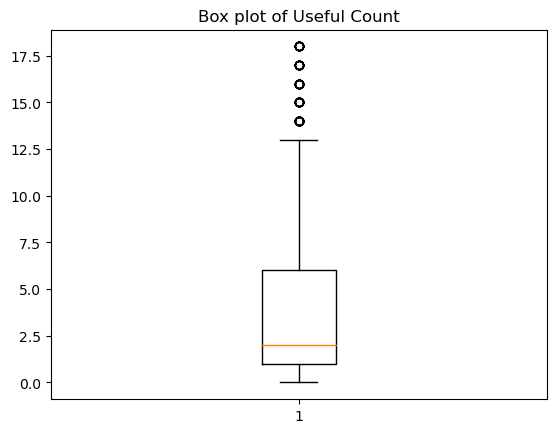

In [82]:
plt.boxplot(data_new["UsefulCount"])
plt.title('Box plot of Useful Count')


In [83]:
data_new[data_new['Satisfaction'] > 5]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race,sentiment,sentiment_label


# Feature engineering

In [85]:
data1=np.where(data_new['Satisfaction'] == 1.0, "Nil", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "Extreme",data1)

In [86]:
data_new['SideEffects']=data1

# Since DrugId is the same, dropping the column

In [87]:
data_new.drop(['Satisfaction','DrugId'], inplace=True, axis=1)

In [88]:
data_new.head()

,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,Name,Race,sentiment,sentiment_label,SideEffects
120403,55-64,Inflammation of the Artery in the Temple Area,1/1/2020,prednisone,5.0,4.0,CVS stated. Claims regarding that it does not ...,Female,nausea vomiting loss appetite heartburn troubl...,0.0,Frank Grant,African American,0.150000,positive,Mild
120404,65-74,Destruction of Red Blood Cells by Body's Own A...,10/1/2019,prednisone,4.0,4.0,It has taken 9 months to taper down from 60mg ...,Male,nausea vomiting loss appetite heartburn troubl...,0.0,Robin Lamb,Hispanic,-0.138889,negative,Severe
120409,35-44,Myasthenia Gravis,9/8/2019,prednisone,1.0,1.0,This med make you sicker and only controls sym...,Male,nausea vomiting loss appetite heartburn troubl...,0.0,Sally Mcguire,Hispanic,-0.226042,negative,Nil
120413,45-54,Other,8/14/2019,prednisone,5.0,5.0,Threw out my back - BAD - right before Christm...,Male,nausea vomiting loss appetite heartburn troubl...,5.0,Jo Scott,Caucasian,-0.056803,negative,Extreme
120419,45-54,Muscle or Bone Disorder,7/20/2019,prednisone,3.0,1.0,Put me on a high dosage for arthritis. I imme...,Male,nausea vomiting loss appetite heartburn troubl...,0.0,David Jones,Asian,0.058571,positive,Nil


In [89]:
data_copy = data_new.copy()

# Feature reduction

# Correlation analysis

Correlation matrix is plotted to check the relationship between variables

<AxesSubplot:>

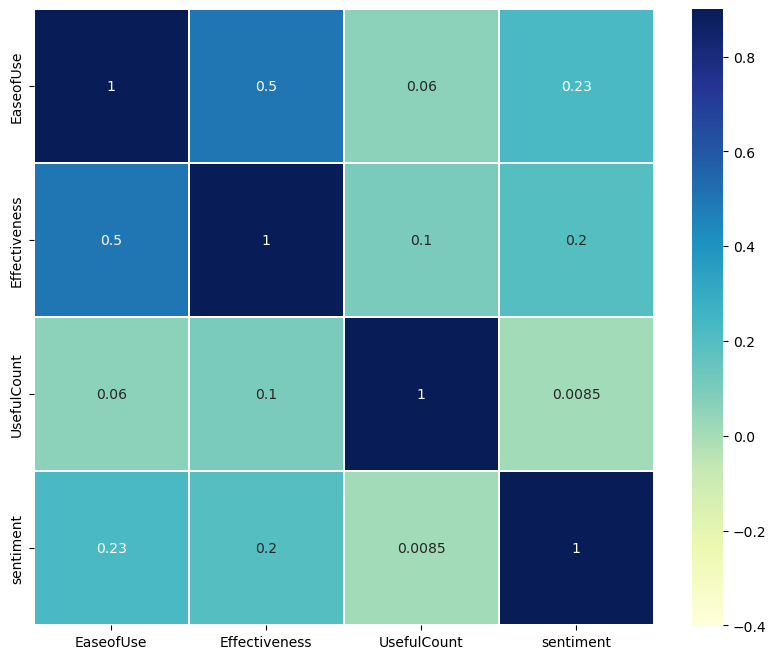

In [90]:
corrmatrix = data_new.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

# Here, being common, dropped the Drug, Sides columns. The other columns such as Date, Name, Reviews and UsefulCount are also dropped since these doesn't deal with side effects of the drug.

In [91]:
data_new=data_new.drop(columns = ['Name','Drug','Date','Sides','Reviews','UsefulCount'],axis=1)
data_new=data_new.reset_index(drop=True)
data_new.head()

,Age,Condition,EaseofUse,Effectiveness,Sex,Race,sentiment,sentiment_label,SideEffects
0,55-64,Inflammation of the Artery in the Temple Area,5.0,4.0,Female,African American,0.150000,positive,Mild
1,65-74,Destruction of Red Blood Cells by Body's Own A...,4.0,4.0,Male,Hispanic,-0.138889,negative,Severe
2,35-44,Myasthenia Gravis,1.0,1.0,Male,Hispanic,-0.226042,negative,Nil
3,45-54,Other,5.0,5.0,Male,Caucasian,-0.056803,negative,Extreme
4,45-54,Muscle or Bone Disorder,3.0,1.0,Male,Asian,0.058571,positive,Nil


In [92]:
data_new.shape

(1914, 9)

# Encoding

In [93]:
#Finding categorical columns and chnaging datatype
for cl in data_new.select_dtypes(include = ['object']):
    data_new[cl]=data_new[cl].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              1914 non-null   category
 1   Condition        1914 non-null   category
 2   EaseofUse        1914 non-null   float64 
 3   Effectiveness    1914 non-null   float64 
 4   Sex              1914 non-null   category
 5   Race             1914 non-null   category
 6   sentiment        1914 non-null   float64 
 7   sentiment_label  1914 non-null   category
 8   SideEffects      1914 non-null   category
dtypes: category(6), float64(3)
memory usage: 60.0 KB


In [94]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [95]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              1914 non-null   category
 1   Condition        1914 non-null   category
 2   EaseofUse        1914 non-null   float64 
 3   Effectiveness    1914 non-null   float64 
 4   Sex              1914 non-null   category
 5   Race             1914 non-null   category
 6   sentiment        1914 non-null   float64 
 7   sentiment_label  1914 non-null   category
 8   SideEffects      1914 non-null   category
dtypes: category(6), float64(3)
memory usage: 60.0 KB


In [96]:
data_new.columns

Index(['Age', 'Condition', 'EaseofUse', 'Effectiveness', 'Sex', 'Race',
       'sentiment', 'sentiment_label', 'SideEffects'],
      dtype='object')

In [97]:
data_new.head()

,Age,Condition,EaseofUse,Effectiveness,Sex,Race,sentiment,sentiment_label,SideEffects
0,55-64,Inflammation of the Artery in the Temple Area,5.0,4.0,Female,African American,0.150000,positive,Mild
1,65-74,Destruction of Red Blood Cells by Body's Own A...,4.0,4.0,Male,Hispanic,-0.138889,negative,Severe
2,35-44,Myasthenia Gravis,1.0,1.0,Male,Hispanic,-0.226042,negative,Nil
3,45-54,Other,5.0,5.0,Male,Caucasian,-0.056803,negative,Extreme
4,45-54,Muscle or Bone Disorder,3.0,1.0,Male,Asian,0.058571,positive,Nil


In [98]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in ['SideEffects', 'Drug','Age','Sex']:
for col in ['Race','Age','Sex','Condition','SideEffects','sentiment','sentiment_label']:   
    data_new[col]=label.fit_transform((data_new[col]).astype(str))
    
data_label=data_new

In [99]:
data_new.head()

,Age,Condition,EaseofUse,Effectiveness,Sex,Race,sentiment,sentiment_label,SideEffects
0,7,45,5.0,4.0,0,0,830,2,1
1,8,27,4.0,4.0,1,3,262,0,4
2,5,60,1.0,1.0,1,3,361,0,3
3,6,65,5.0,5.0,1,2,139,0,0
4,6,59,3.0,1.0,1,1,653,2,3


In [100]:
data_new.shape

(1914, 9)

# Scaling

In [101]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Effectiveness','EaseofUse']
data_new[scale] = ss.fit_transform(data_new[scale])

In [102]:
data_new.shape

(1914, 9)

In [103]:
#data_new.to_csv('drug_topamax_modelling.csv', index=False)
data_model = data_new.copy()

# Exploratory Data Analysis

# 1. Top 20 Drugs

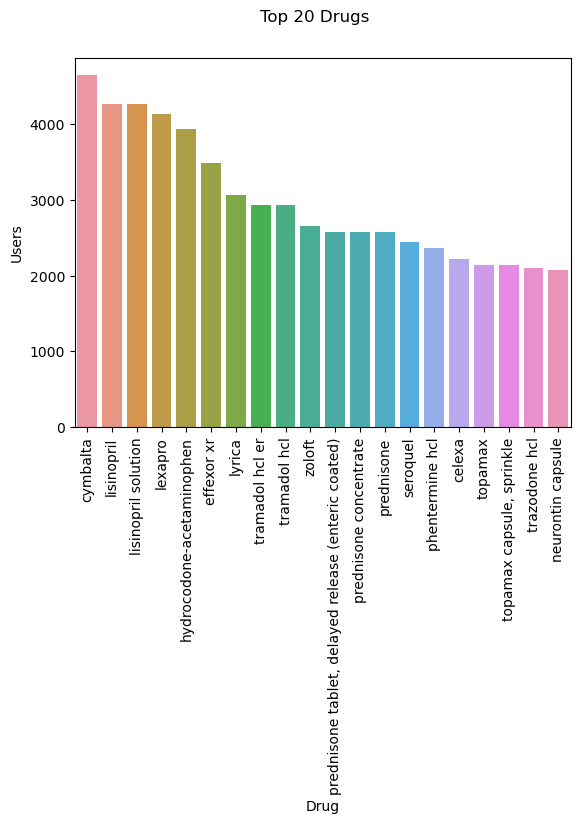

In [104]:
data1= df['Drug'].value_counts().head(20).reset_index()
data1.columns = ['Drug', 'Users']
sns.barplot(data=data1, x = 'Drug', y = 'Users')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

# 2. Top 20 Conditions

In [ ]:
df['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

# 3. Conditions - Prednisone

In [ ]:
drug_prednisone['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(8,8))
plt.suptitle("prednisone Conditions")
plt.xlabel('Condition')
plt.ylabel('Count')

# Users by Gender - prednisone

In [ ]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data_copy)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

## 5. Users by Race - prednisone

In [ ]:
data_copy['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

## 6. Users by Race and Gender

In [ ]:
sns.countplot(x='Race',hue='Sex',data=data_copy)
plt.title("Users by Race and Gender", fontsize = 10)

## 7. Users by Age and Gender

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data_copy)
plt.title("Users by Age and Gender", fontsize = 10)

## 8. Correlation Heatmap

In [ ]:
# heatmap of the data for checking the correlation
corrmatrix = data_copy.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

## 9. Yearly Reviews - prednisone

In [ ]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], errors = 'coerce')

In [ ]:
#extracting year from Date
data_copy['Year'] = data_copy['Date'].dt.year

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data_copy['Year'], palette ='colorblind')
plt.title('Number of yearly reviews', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

## 10. Effectiveness

In [ ]:
data_copy['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

## 11. Ease of Use

In [ ]:
data_copy['EaseofUse'].value_counts().plot(kind='bar')
plt.title("Ease of use", fontsize = 10)
plt.xlabel("EaseofUse", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

## 12. Useful Count

In [ ]:
data_copy['UsefulCount'].value_counts().plot(kind='bar')
plt.title("Useful Count", fontsize = 15)
plt.xlabel("UsefulCount", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

## 13. Users by Effectiveness and Gender

In [ ]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data_copy, kind="count",
                height=6,aspect =.9);


## 14. Side Effects

In [ ]:
plt.figure(figsize=(6,6))
data_copy['SideEffects'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

## 15. Side Effects and Age

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='SideEffects',data=data_copy)

## 16. Side Effects and Gender

<Figure size 2000x1000 with 0 Axes>

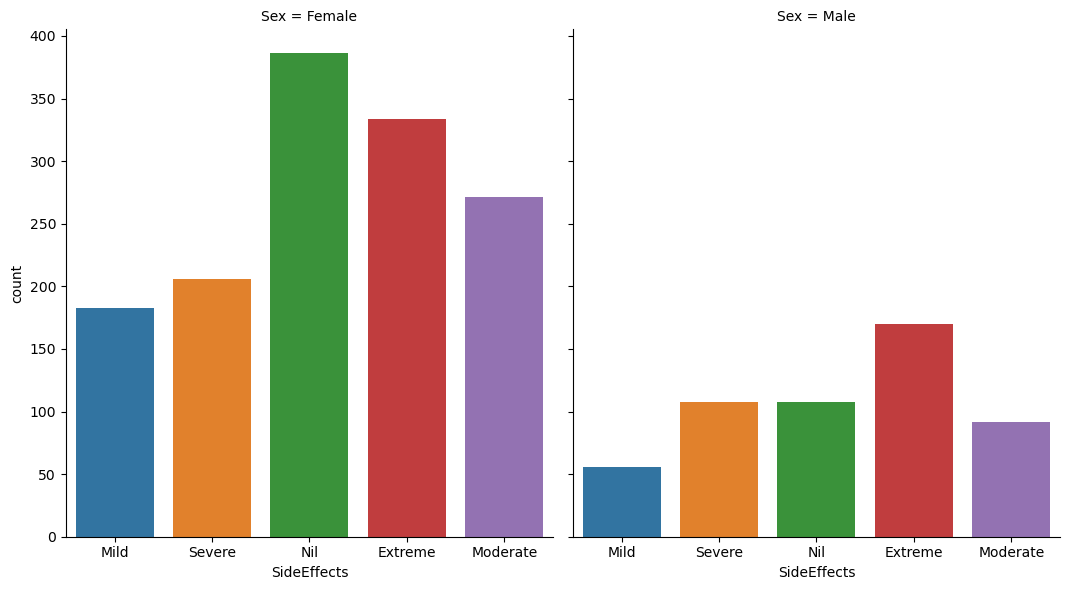

In [105]:
plt.figure(figsize=(20,10))

g = sns.catplot(x="SideEffects",col="Sex",data=data_copy, kind="count",height=6,aspect =.9);

## 17. Side Effects and Race

<AxesSubplot:xlabel='Race', ylabel='count'>

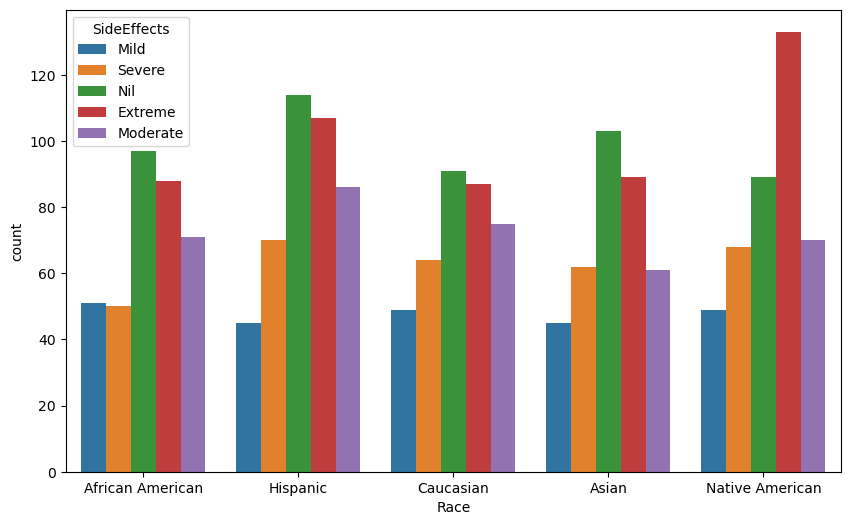

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='SideEffects',data=data_copy)

# Splitting the data

In [108]:
#target
y = data_new['SideEffects']

In [109]:
X = data_new.drop(['SideEffects'],axis=1)

In [110]:
X.shape

(1914, 8)

# Splitting the dataset into train and test sets

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)#assigninng values

In [112]:
X_train.shape

(1531, 8)

In [113]:
X_test.shape

(383, 8)

In [114]:
y_train.shape

(1531,)

In [115]:
y_test.shape

(383,)

# Modelling

## 1. Logistic Regression Model

In [137]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(max_iter=1000,solver='liblinear')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

### Performance Evaluation

In [139]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  53.00261096605744


## Confusion Matrix of Logistic Regression Model

In [140]:
confusion_matrix(y_test,y_pred)

array([[86,  0,  3,  1,  3],
       [ 6,  0,  9, 21,  1],
       [21,  0, 17, 25,  4],
       [ 7,  1, 14, 91,  1],
       [32,  0, 27,  4,  9]], dtype=int64)

# 2. KNN Model

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
from sklearn.metrics import accuracy_score
import warnings
# Suppress the warning
warnings.filterwarnings("ignore", category=FutureWarning)
acc_values = []
neighbors = np.arange(3, 15)

# Creating a loop to create KNN model for each K value
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)  # Create an instance of KNN with k neighbors
    classifier.fit(X_train, y_train)  # Train the model
    y_pred = classifier.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Compute accuracy score
    acc_values.append(acc)  # Append accuracy score to the list


In [145]:
acc_values

[0.31592689295039167,
 0.3028720626631854,
 0.28720626631853785,
 0.30548302872062666,
 0.33159268929503916,
 0.3368146214099217,
 0.34203655352480417,
 0.30548302872062666,
 0.30548302872062666,
 0.30548302872062666,
 0.31070496083550914,
 0.3237597911227154]

## To find which k value got the highest accuracy, plotted a graph between neighbor values (i.e. k values) and accuracy values

Text(0, 0.5, 'accuracy')

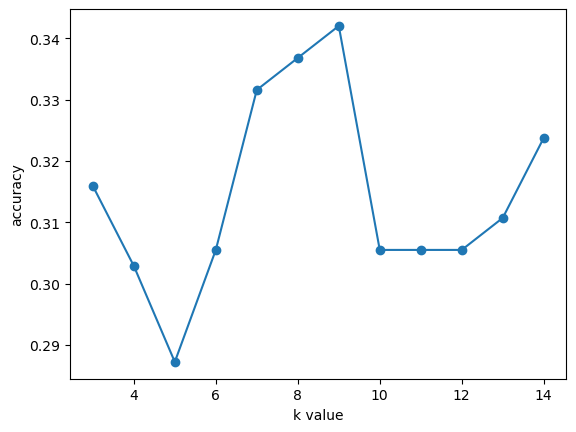

In [146]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [149]:
classifier = KNeighborsClassifier(n_neighbors= 9, metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [150]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  34.20365535248042


## Confusion Matrix for KNN Classifier

In [151]:
confusion_matrix(y_test,y_pred)

array([[58,  6, 11,  8, 10],
       [14,  2,  6, 11,  4],
       [30,  5, 15, 10,  7],
       [23, 15, 21, 47,  8],
       [42,  3,  9,  9,  9]], dtype=int64)

# 3. Decision Tree Classifier

In [152]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

## Performance Evaluation

In [153]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  47.51958224543081


## Confusion Matrix of Decision Tree Model

In [154]:
confusion_matrix(y_test,y_pred)

array([[61,  3,  9,  6, 14],
       [ 6,  5,  9, 13,  4],
       [11, 12, 17, 11, 16],
       [ 5, 12,  9, 78, 10],
       [19,  9, 17,  6, 21]], dtype=int64)

# 4. Support Vector Machine

## a. Linear SVM

In [155]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')#creating an instance
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)

## Performance Evaluation

In [156]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  56.919060052219315


## Confusion Matrix of Linear SVM Model

In [157]:
confusion_matrix(y_test,y_pred)

array([[74,  0,  3,  0, 16],
       [ 3,  0, 12, 17,  5],
       [12,  1, 25, 14, 15],
       [ 5,  3, 14, 86,  6],
       [13,  2, 23,  1, 33]], dtype=int64)

# b. Polynomial SVM

In [158]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)

## Performance Evaluation

In [159]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  34.20365535248042


### Confusion Matrix of Polynomial SVM

In [160]:
confusion_matrix(y_test,y_pred)

array([[35,  0,  0, 58,  0],
       [ 6,  0,  0, 31,  0],
       [20,  0,  0, 47,  0],
       [18,  0,  0, 96,  0],
       [35,  0,  0, 37,  0]], dtype=int64)

# c. Radial SVM

In [161]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

## Performance Evaluation

In [162]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  33.68146214099217


### Confusion Matrix

In [164]:
confusion_matrix(y_test,y_pred)

array([[38,  0,  0, 55,  0],
       [ 7,  0,  0, 30,  0],
       [26,  0,  0, 41,  0],
       [23,  0,  0, 91,  0],
       [42,  0,  0, 30,  0]], dtype=int64)

# 5. Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#training the model
rf.fit(X_train,y_train)
#to make predictions
y_pred=rf.predict(X_test)

In [166]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  56.6579634464752


In [167]:
confusion_matrix(y_test,y_pred)

array([[77,  0,  4,  2, 10],
       [ 4,  6, 11, 13,  3],
       [15,  5, 24,  7, 16],
       [ 6,  7, 10, 82,  9],
       [18,  4, 19,  3, 28]], dtype=int64)

# Feature Importance

In [168]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

Effectiveness      20.410461
sentiment          20.231961
Condition          17.837481
EaseofUse          14.529255
Age                11.728883
Race                9.764881
Sex                 2.765290
sentiment_label     2.731788
dtype: float64

## Fine tuning of hyper parameters

In [169]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [170]:
# creating another instance of random forest classifier with some changes in hyperparameter
rft= RandomForestClassifier(bootstrap=True, n_estimators=1000,max_depth=8,random_state =42,criterion='entropy')

In [171]:
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=1000,
                       random_state=42)

In [172]:
y_pred=rft.predict(X_test)

In [173]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)


Accuracy is :  57.702349869451695


# 6. Gradient Boosting

In [174]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [175]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  55.87467362924282


In [176]:
confusion_matrix(y_test,y_pred)

array([[81,  0,  6,  0,  6],
       [ 4,  5, 13, 12,  3],
       [17,  2, 24,  7, 17],
       [ 6,  9, 14, 74, 11],
       [23,  4, 14,  1, 30]], dtype=int64)

# 7. Extreme Gradient Boosting

In [178]:
pip install xgboost


     ---------------------------------------- 70.9/70.9 MB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [179]:
from xgboost import XGBClassifier
#creating an instance
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

In [180]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  51.958224543080945


In [181]:
confusion_matrix(y_test,y_pred)

array([[74,  0,  5,  2, 12],
       [ 5,  6, 14, 10,  2],
       [14,  6, 23, 11, 13],
       [ 6, 11, 14, 73, 10],
       [16,  6, 23,  4, 23]], dtype=int64)